In [17]:
import pyro
import pyro.contrib.gp as gp
import numpy as np
import torch
import matplotlib.pyplot as plt

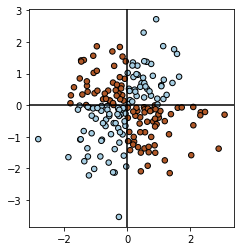

In [18]:
X = torch.randn(200, 2)
Y = torch.logical_xor(X[:, 0] > 0, X[:, 1] > 0).double()

plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
plt.gca().set_aspect("equal")
plt.axhline(0, color="k")
plt.axvline(0, color="k")

In [19]:
kernel = gp.kernels.RBF(input_dim=2)
kernel = gp.kernels.DotProduct(input_dim=2)
kernel = gp.kernels.Linear(input_dim=2, )

In [20]:
pyro.clear_param_store()
likelihood = gp.likelihoods.Binary()
model = gp.models.VariationalGP(
    X, Y, kernel, likelihood=likelihood, whiten=True, jitter=1e-03)
num_steps = 1000
loss = gp.util.train(model, num_steps=num_steps)

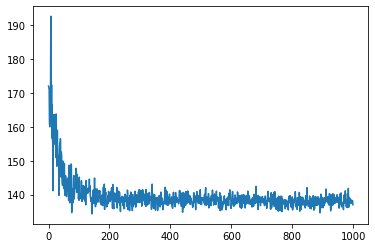

In [21]:
plt.plot(loss)

In [22]:
mean, var = model(X)

In [23]:
y_hat = model.likelihood(mean, var)

print(f"Accuracy: {(y_hat==Y).sum()/(len(Y)) :0.2f}")

Accuracy: 0.49


In [24]:
xs = torch.linspace(-2, 2, steps=100)
ys = torch.linspace(-2, 2, steps=100)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")

In [25]:
with torch.no_grad():
    mean, var = model(torch.vstack((xx.ravel(), yy.ravel())).t())
    Z = model.likelihood(mean, var).reshape(xx.shape)

In [26]:
def plot_pred_2d(arr, xx, yy, contour=False, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    image = ax.imshow(
    arr,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="equal",
    origin="lower",
    cmap=plt.cm.PuOr_r)
    ax.get_figure().colorbar(image)
    if contour:
        contours = ax.contour(
        xx,
        yy,
        torch.sigmoid(mean).reshape(xx.shape),
        levels=[0.5],
        linewidths=2,
        colors=["k"],
    )
        
    ax.set_xticks(())
    ax.set_yticks(())    

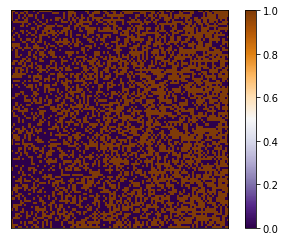

In [27]:
plot_pred_2d(Z, xx, yy)

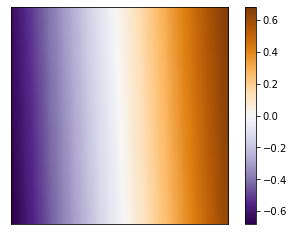

In [28]:
plot_pred_2d(mean.reshape(xx.shape), xx, yy)

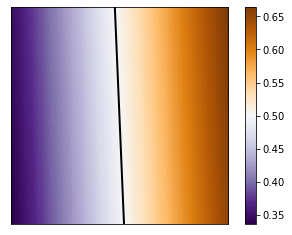

In [29]:
plot_pred_2d(torch.sigmoid(mean).reshape(xx.shape), xx, yy, contour=True)

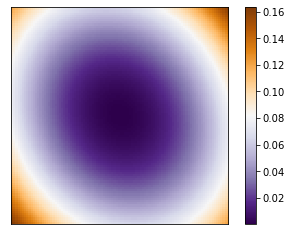

In [30]:
plot_pred_2d(var.reshape(xx.shape), xx, yy, contour=False)

In [65]:

kernel = gp.kernels.Polynomial(input_dim=2, degree=2, bias=torch.tensor(1.))

In [66]:
kernel

Polynomial()

In [67]:
pyro.clear_param_store()
likelihood = gp.likelihoods.Binary()
model = gp.models.VariationalGP(
    X, Y, kernel, likelihood=likelihood, whiten=True, jitter=1e-02)
num_steps = 1000
loss = gp.util.train(model, num_steps=num_steps)

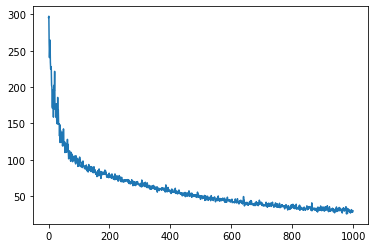

In [68]:
plt.plot(loss)

In [69]:
mean, var = model(X)

In [70]:
y_hat = model.likelihood(mean, var)

print(f"Accuracy: {(y_hat==Y).sum()/(len(Y)) :0.2f}")

Accuracy: 0.92


In [71]:
xs = torch.linspace(-2, 2, steps=100)
ys = torch.linspace(-2, 2, steps=100)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")

In [72]:
with torch.no_grad():
    mean, var = model(torch.vstack((xx.ravel(), yy.ravel())).t())
    Z = model.likelihood(mean, var).reshape(xx.shape)

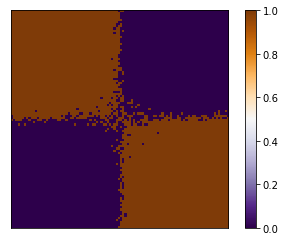

In [73]:
plot_pred_2d(Z, xx, yy)

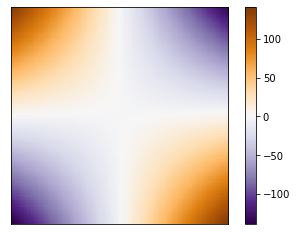

In [74]:
plot_pred_2d(mean.reshape(xx.shape), xx, yy)